<h1 style='color: darkgreen; font-size: 36px; font-weight: bold;'>Data Science - Linear Regression</h1>

# <font color='lightgreen' style='font-size: 30px;'>Imports</font>
<hr style='border: 2px solid lightgreen;'>

## Importing pandas

https://pandas.pydata.org/

In [2]:
import pandas as pd
import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt

## Dataset read
<hr>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>price</b> - Price of the house in BRL (R$)</li>
    <li><b>area</b> - Building area (m²)</li>
    <li><b>dist_beach</b> - Distance from the nearest beach in (km)</li>
    <li><b>dist_drugstore</b> - Distance from the nearest drugstore in (km)</li>
</ul>

## Data Import

In [3]:
df = pd.read_csv('../data/dataset.csv', sep=';')

## Rename columns

In [4]:
new_cols = {
    'Valor':'price',
    'Area':'area',
    'Dist_Praia':'dist_beach',
    'Dist_Farmacia':'dist_drugstore'
}

df.rename(columns=new_cols,inplace=True)

## Data Visualization

In [5]:
df.head()

,price,area,dist_beach,dist_drugstore
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Checking the size of the dataset

In [6]:
# Number of rows
df.shape[0]

5000

# <font color='lightgreen' style='font-size: 30px;'>Fisrt look</font>
<hr style='border: 2px solid lightgreen;'>

## Descriptive analysis

In [7]:
df.describe().round(2)

,price,area,dist_beach,dist_drugstore
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Correlation (using seaborn heatmap)

<AxesSubplot: >

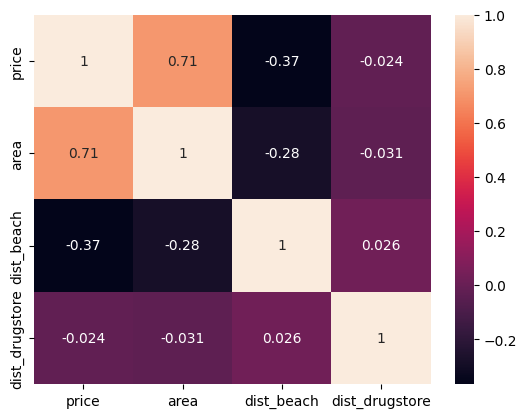

In [8]:
sns.heatmap(df.corr(),annot=True)

# <font color='lightgreen' style='font-size: 30px;'>Dependant variable (y) behavior</font>
<hr style='border: 2px solid lightgreen;'>

## Seaborn style config

In [10]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

## Dependant variable boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot: title={'center': 'Real Stat Price'}, xlabel='Reais (BRL)'>

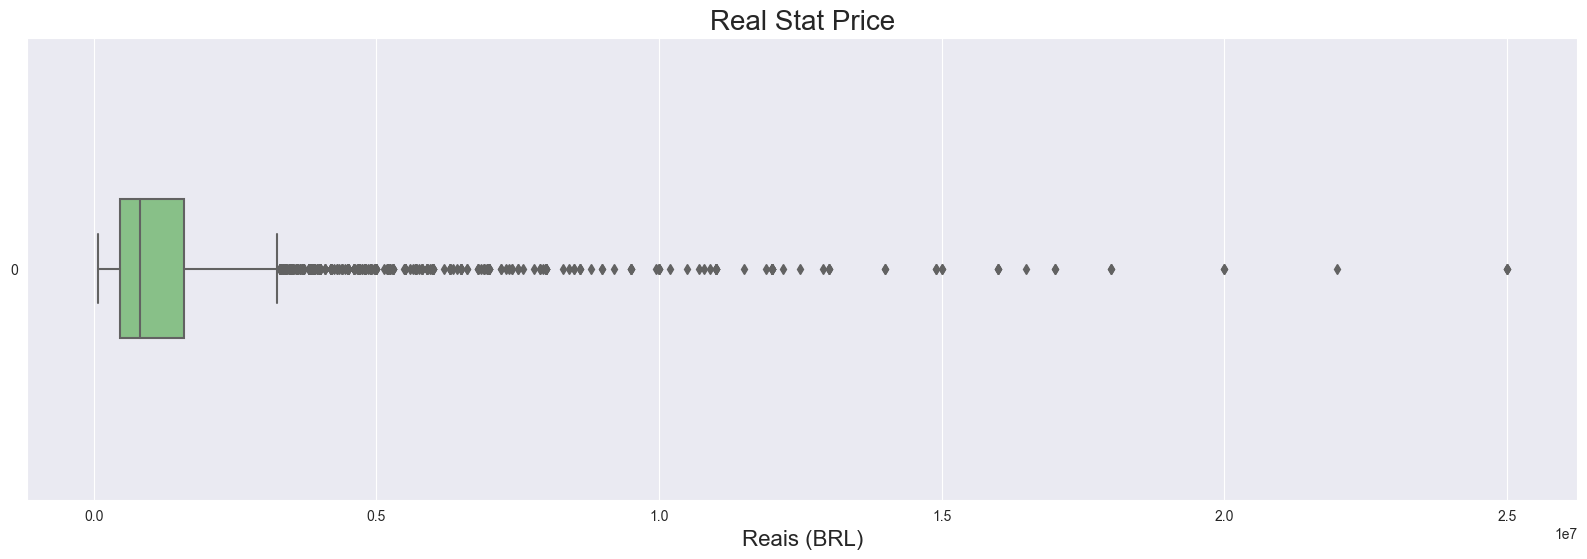

In [11]:
ax = sns.boxplot(data = df.price, orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Real Stat Price', fontsize=20)
ax.set_xlabel('Reais (BRL)', fontsize=16)
ax

# <font color='lightgreen' style='font-size: 30px;'>Frequency distribution (Histogram)</font>
<hr style='border: 2px solid lightgreen;'>

## Frequency distribution of the dependant variable (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot: title={'center': 'Frequency distribution'}, xlabel='Real State Price BRL(R$)', ylabel='Count'>

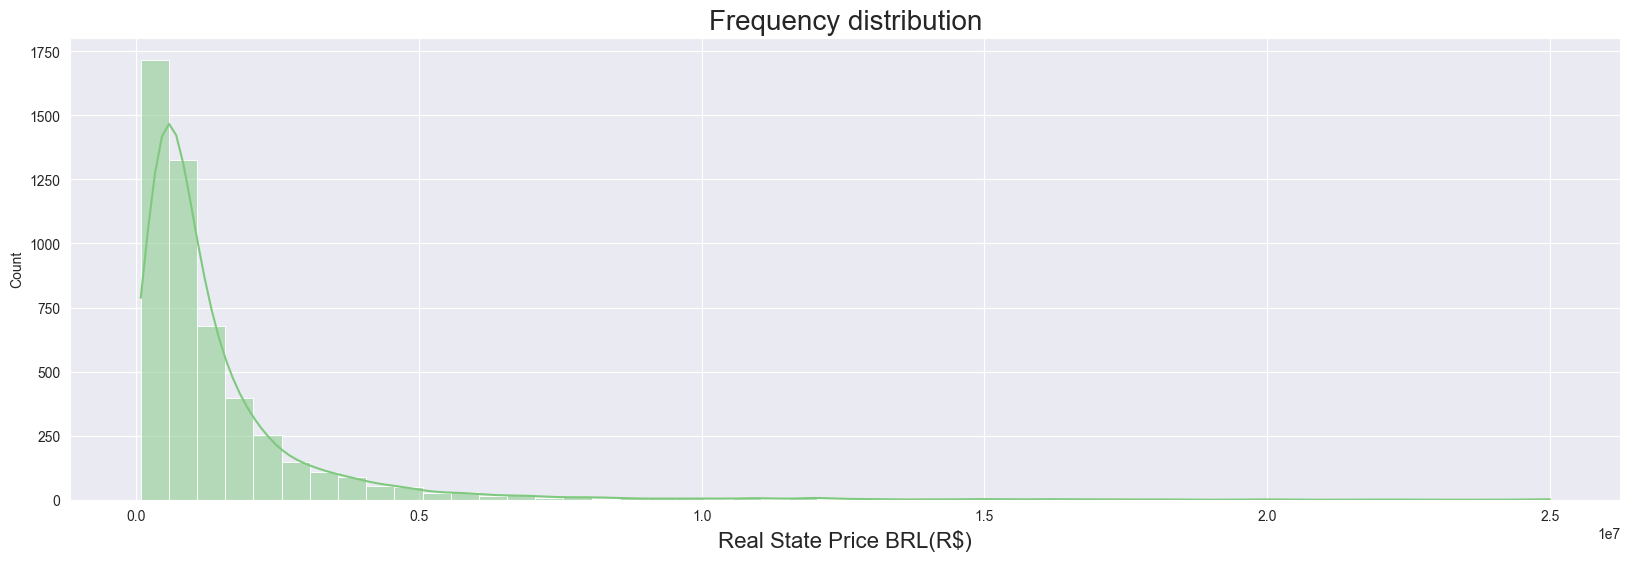

In [14]:
ax = sns.histplot(data =df.price,kde=True,bins=50)
ax.figure.set_size_inches(20, 6)
ax.set_title('Frequency distribution', fontsize=20)
ax.set_xlabel('Real State Price BRL(R$)', fontsize=16)
ax

# <font color='lightgreen' style='font-size: 30px;'>Dispersion between variables</font>
<hr style='border: 2px solid lightgreen;'>

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

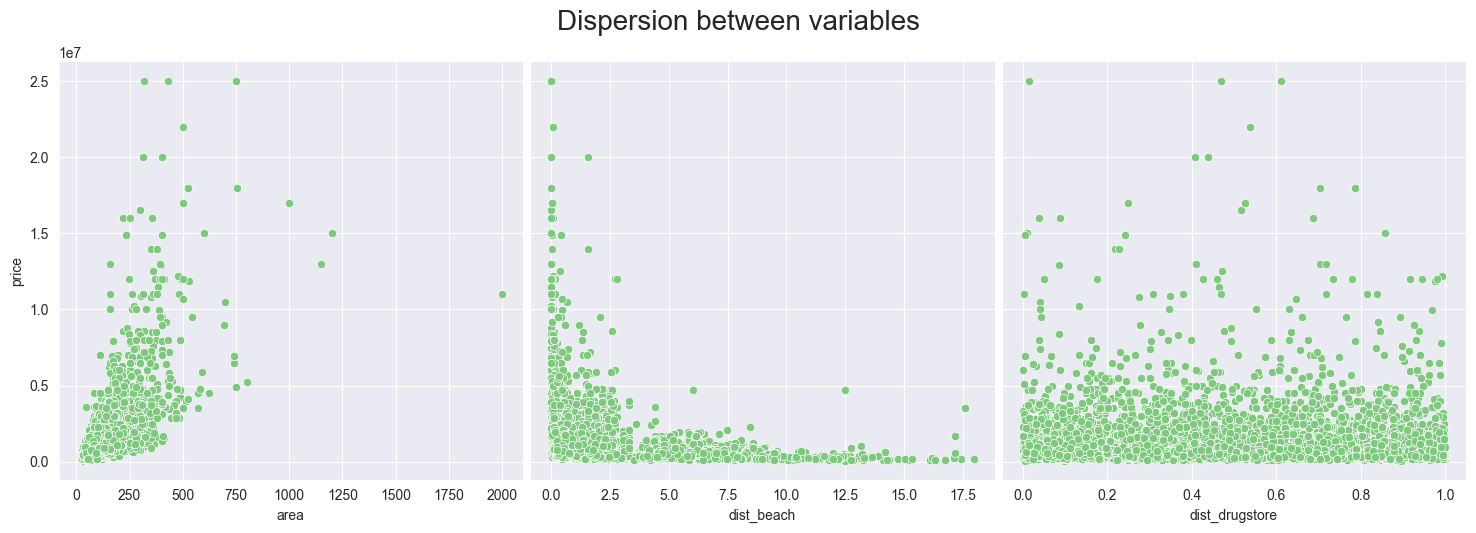

In [15]:
ax = sns.pairplot(data = df, y_vars='price', x_vars=['area','dist_beach','dist_drugstore'],height=5)
ax.fig.suptitle('Dispersion between variables', fontsize=20, y=1.05)
ax

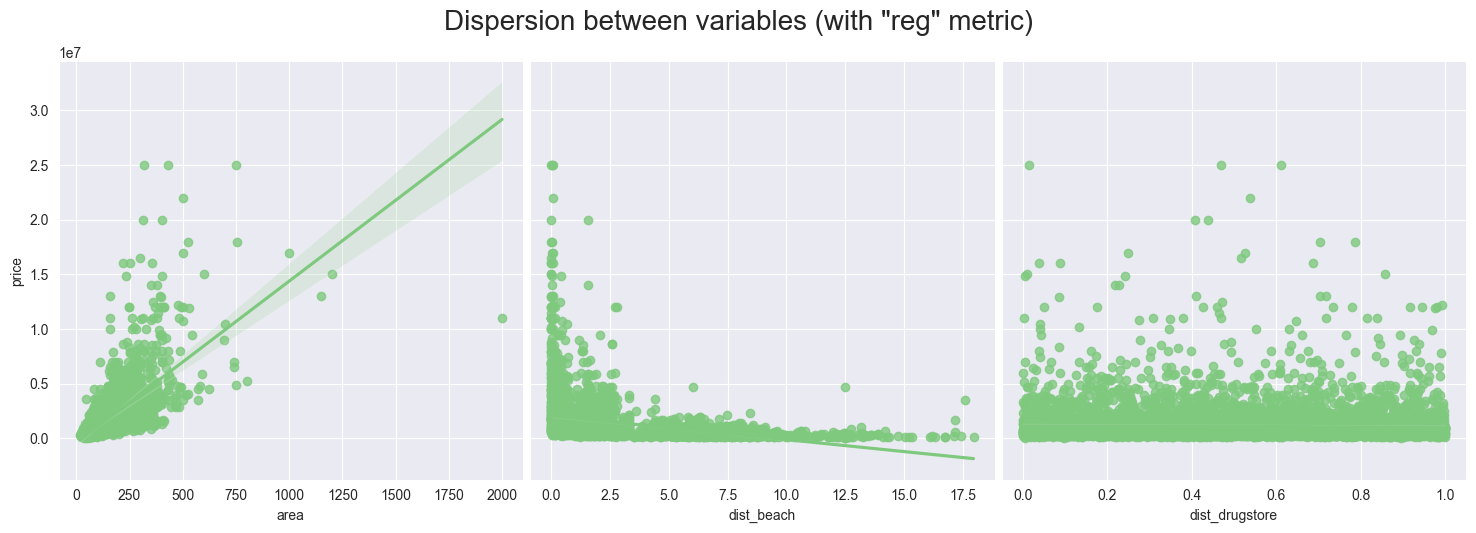

In [17]:
ax = sns.pairplot(data = df, y_vars='price', x_vars=['area','dist_beach','dist_drugstore'],kind='reg',height=5)
ax.fig.suptitle('Dispersion between variables (with "reg" metric)', fontsize=20, y=1.05)
ax

# <font color='lightgreen' style='font-size: 30px;'>Transforming Data</font>
<hr style='border: 2px solid lightgreen;'>

## Log Transformation

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [18]:
np.log(0)

/var/folders/9b/chbv6pc14hg54wt98t15fhtm0000gn/T/ipykernel_642/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [19]:
df.columns

Index(['price', 'area', 'dist_beach', 'dist_drugstore'], dtype='object')

In [20]:
df['log_price'] = np.log(df['price'])
df['log_area'] = np.log(df['area'])
df['log_dist_beach'] = np.log(df['dist_beach'] + 1 )
df['log_dist_drugstore'] = np.log(df['dist_drugstore'] + 1 )

In [21]:
df.head()

,price,area,dist_beach,dist_drugstore,log_price,log_area,log_dist_beach,log_dist_drugstore
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Frequency distribution of the Log dependent variable (y)

<AxesSubplot: title={'center': 'Frequency Distribution'}, xlabel='Real State log', ylabel='Count'>

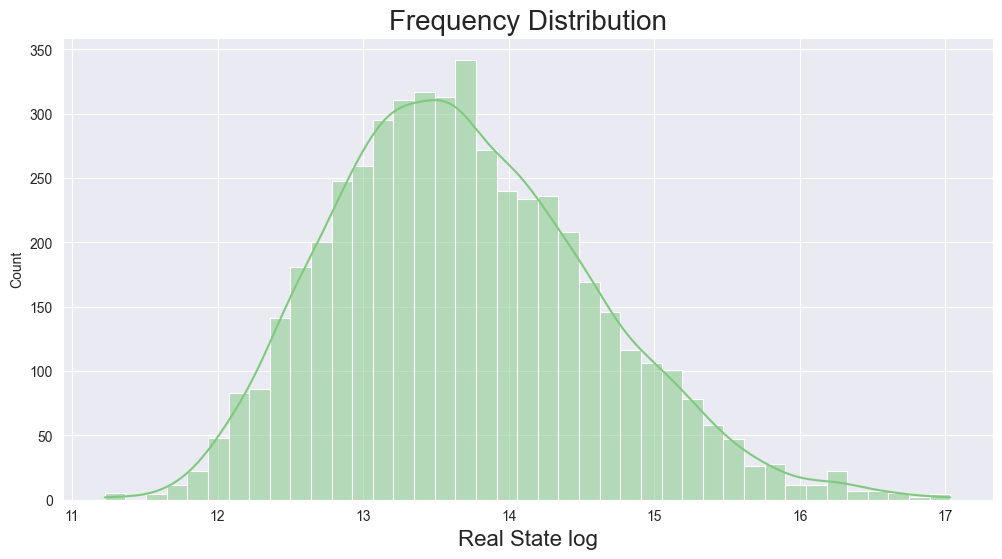

In [22]:
ax = sns.histplot(df.log_price,kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_xlabel('Real State log', fontsize=16)
ax

# <font color='lightgreen' style='font-size: 30px;'>Checking the linear correlation</font>
<hr style='border: 2px solid lightgreen;'>

## Pairplot with transformed data

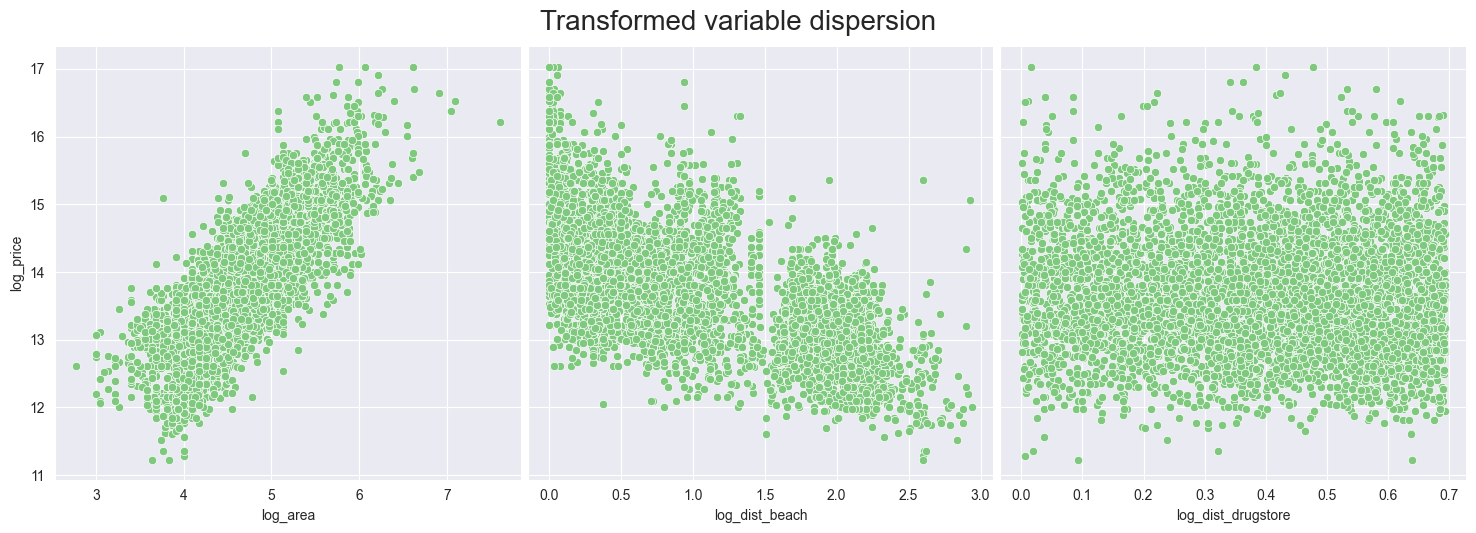

In [23]:
ax = sns.pairplot(data = df, y_vars='log_price', x_vars=['log_area','log_dist_beach','log_dist_drugstore'],height=5)
ax.fig.suptitle('Transformed variable dispersion', fontsize=20, y=1.05)
ax

# <font color='lightgreen' style='font-size: 30px;'>Splitting between train and test datasets</font>
<hr style='border: 2px solid lightgreen;'>

## Importing *train_test_split* from *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split

## Creating a Price Pandas Series (y)

In [25]:
y = df.log_price

## Independent variables dataset (X)

In [26]:
X = df[['log_area','log_dist_beach','log_dist_drugstore']]

## Creating TRAIN and TEST dataset > 80% for training and 20% for testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=2811)

# <font color='fuchsia' style='font-size: 30px;'>Linear Regression</font>
<hr style='border: 2px solid fuchsia;'>



## Importing statsmodels

https://www.statsmodels.org/stable/index.html

In [28]:
import statsmodels.api as sm

## Estimating the model with statsmodels

In [29]:
X_train_constant = sm.add_constant(X_train)

In [30]:
model_statsmodels = sm.OLS(y_train, X_train_constant, hasconst=True).fit()

# <font color='lightgreen' style='font-size: 30px;'>Estimated model score</font>
<hr style='border: 2px solid lightgreen;'>

## Model summary

In [31]:
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:42:55   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.3417      0

# <font color='lightgreen' style='font-size: 30px;'>New model with adjustments</font>
<hr style='border: 2px solid lightgreen;'>

## Creating a new independent variables dataset(X)

In [32]:
X = df[['log_area','log_dist_beach']]

## Creating again my Train and Test datasets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=2811)

## Using statosmodels to check once more the parameters of the model

In [34]:
X_train_constant = sm.add_constant(X_train)

In [35]:
model_statsmodels = sm.OLS(y_train, X_train_constant, hasconst=True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [36]:
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:45:38   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# <font color='lightgreen' style='font-size: 30px;'>Estimating the model with train data</font>
<hr style='border: 2px solid lightgreen;'>

## Importing *LinearRegression* and *metrics* from *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Declaring *LinearRegression()*

In [38]:
model = LinearRegression()

## Fitting my model with Train data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [39]:
model.fit(X_train,y_train)

LinearRegression()

## Obtaining R² from the training model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### R²

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [40]:
print(f'R² = {model.score(X_train,y_train).round(3)}')

R² = 0.805


## Predicting the Y using the Test data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [41]:
y_predicted = model.predict(X_test)

## Obtaining R² from the training model

In [42]:
print(f'R² = {metrics.r2_score(y_test, y_predicted).round(3)}')

R² = 0.79


# <font color='lightgreen' style='font-size: 30px;'>Isolated Predictions</font>
<hr style='border: 2px solid lightgreen;'>

## Entry data

In [43]:
entry = X_test[0:1]
entry

,log_area,log_dist_beach
1006,5.273,1.282769


## Gerando previsão pontual

In [44]:
model.predict(entry)[0]

14.28482006184788

## Getting it back in BRL - R$ once it´s being displayed in Log
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [46]:
np.exp(model.predict(entry)[0]).round(2)

1598889.78

## Creating a "simple" simulator

In [49]:
area = 150
dist_beach = 1
entry = [[np.log(area),np.log(dist_beach + 1)]]

print(f'R$ {np.exp(model.predict(entry)[0]).round(2)}')

R$ 1617664.12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='lightgreen' style='font-size: 30px;'>Interpreting the coeficients</font>
<hr style='border: 2px solid lightgreen;'>

## Intercept indicator

In [50]:
model.intercept_

9.334916409800329

In [51]:
# Converting from Log to BRL
np.exp(model.intercept_).round(2)

11326.68

## Regression Coeficients

In [52]:
model.coef_

array([ 1.05807818, -0.49061226])

## Ploting those metrics in a tiny df

In [53]:
index = ['Intercept','Area Log','Log Dist Beach']
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index = index, columns = ['Parameters'])

,Parameters
Intercept,9.334916
Area Log,1.058078
Log Dist Beach,-0.490612


## Interpreting the DF

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercept</b> → Not considering tre independent variables, the mean Real State price effect would be <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Keeping the distance from the beach as a constant, a 1% increase in the area is equivalent to a <b>1.06%</b> increase in the Price
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Keeping the area as a constant, a 1% increase in the distance form the beach is equivalent to a <b>0.49%</b> increase in the Price
</p>

# <font color='lightgreen' style='font-size: 30px;'>Plotting the model analysis</font>
<hr style='border: 2px solid lightgreen;'>

## Predicting the train data

In [54]:
y_predicted_train = model.predict(X_train)

## Scatterplot of the difference between the Predicted Price and the Real Price

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot: title={'center': 'Prediction X Reality'}, xlabel='log of the price - Predicted', ylabel='log of the price - Reality'>

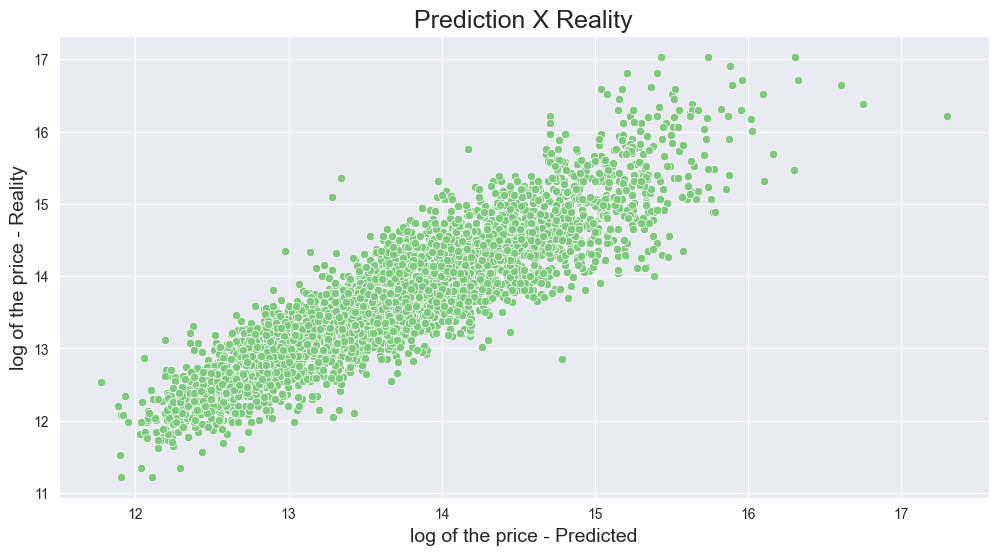

In [55]:
ax = sns.scatterplot(x= y_predicted_train, y= y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Prediction X Reality', fontsize=18)
ax.set_xlabel('log of the price - Predicted', fontsize=14)
ax.set_ylabel('log of the price - Reality', fontsize=14)
ax

## Residual Plot

In [56]:
residue = y_train - y_predicted_train

## Plotting a residual Histogram

<AxesSubplot: title={'center': 'Histogram of the residuals'}, xlabel='log of the price', ylabel='Count'>

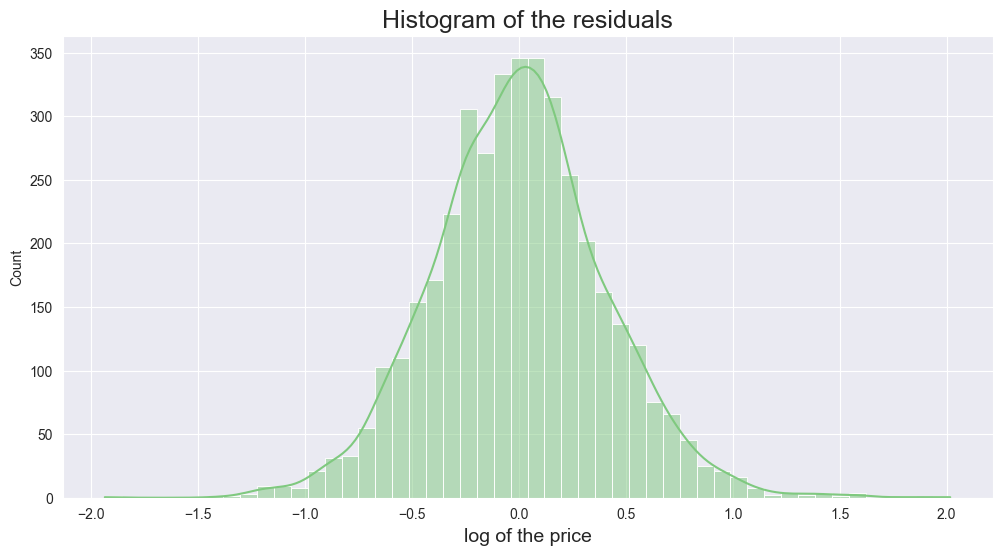

In [57]:
ax = sns.histplot(residue,kde=True,bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histogram of the residuals', fontsize=18)
ax.set_xlabel('log of the price', fontsize=14)
ax